# Testing different activation functions and depths of the network

## Imports

In [36]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import importlib, prepare_data, neural_network
importlib.reload(prepare_data)
importlib.reload(neural_network)

# --- Our own code ---
from neural_network import NeuralNetwork
from optimizers import SGD, RMSprop, Adam
from losses import mse, mse_deriv
from activations import sigmoid, sigmoid_deriv, linear, linear_deriv, relu, relu_deriv, leaky_relu, leaky_relu_deriv
from prepare_data import prepare_data

## Prepare data

In [37]:
seed = 6114
n_datapoints = 100
x, y, x_train, x_test, y_train, y_test = prepare_data(n=n_datapoints)

scaler_x = StandardScaler()
x_train_s = scaler_x.fit_transform(x_train)
x_test_s = scaler_x.transform(x_test)
x_s = scaler_x.transform(x)

### Training curves for different network depths, 32 nodes per layer: Sigmoid Activations

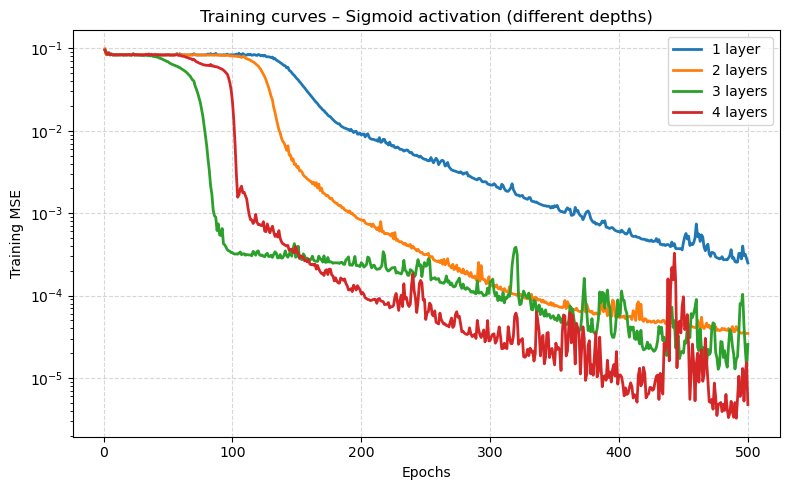

Test MSE for different depths: 
Depth=1, Test MSE = 0.000330342845458311
Depth=2, Test MSE = 6.822858821224584e-05
Depth=3, Test MSE = 5.171168052721517e-05
Depth=4, Test MSE = 7.0885331930634e-06


In [38]:
### SIGMOID ACTIVATION ###
architectures = [
    ([32, 1], [sigmoid, linear], [sigmoid_deriv, linear_deriv]),
    ([32, 32, 1], [sigmoid, sigmoid, linear], [sigmoid_deriv, sigmoid_deriv, linear_deriv]),
    ([32, 32, 32, 1], [sigmoid, sigmoid, sigmoid, linear], [sigmoid_deriv, sigmoid_deriv, sigmoid_deriv, linear_deriv]),
    ([32, 32, 32, 32, 1], [sigmoid, sigmoid, sigmoid, sigmoid, linear], [sigmoid_deriv, sigmoid_deriv, sigmoid_deriv, sigmoid_deriv, linear_deriv])
]
learnings = []
test_MSEs_sigmoid = []
for arc in architectures:
    nn = NeuralNetwork(network_input_size=1,
                       layer_output_sizes=arc[0],
                       activation_funcs=arc[1],
                       activation_ders=arc[2],
                       cost_fun=mse,
                       cost_der=mse_deriv,
                       seed=seed)
    optimizer = Adam(lr=1e-2)
    history = nn.fit(x_train_s, 
                     y_train, 
                     epochs=500,
                     batch_size=32,
                     optimizer=optimizer,
                     log_every=None)
    learnings.append(history["train_loss"])
    y_pred_test = nn.predict(x_test_s)
    test_MSEs_sigmoid.append(mse(y_pred_test, y_test))
    
### Plotting training curves ###
plt.figure(figsize=(8,5))
depth_labels = ["1 layer", "2 layers", "3 layers", "4 layers"]
for losses, label in zip(learnings, depth_labels):
    epochs = np.arange(1, len(losses)+1)
    plt.plot(epochs, losses, label=label, linewidth=2)
plt.yscale("log")
plt.xlabel("Epochs")
plt.ylabel("Training MSE")
plt.title("Training curves – Sigmoid activation (different depths)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### Printing MSE for test data ###
print("Test MSE for different depths: ")
for i in range(len(test_MSEs_sigmoid)):
    print(f"Depth={i+1}, Test MSE = {test_MSEs_sigmoid[i]}")
    


    

### Training curves for different network depths, 32 nodes per layer: ReLU Activations

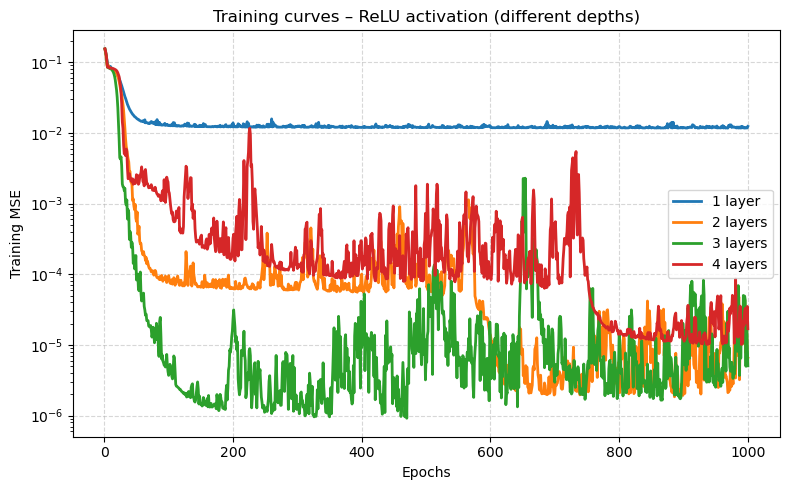

Test MSE for different depths: 
Depth=1, Test MSE = 0.014517936979527985
Depth=2, Test MSE = 1.390455953545904e-05
Depth=3, Test MSE = 8.690166902100806e-06
Depth=4, Test MSE = 5.7273806655208465e-06


In [39]:
### ReLU ACTIVATION ###
architectures = [
    ([32, 1], [relu, linear], [relu_deriv, linear_deriv]),
    ([32, 32, 1], [relu, relu, linear], [relu_deriv, relu_deriv, linear_deriv]),
    ([32, 32, 32, 1], [relu, relu, relu, linear], [relu_deriv, relu_deriv, relu_deriv, linear_deriv]),
    ([32, 32, 32, 32, 1], [relu, relu, relu, relu, linear], [relu_deriv, relu_deriv, relu_deriv, relu_deriv, linear_deriv])
]
learnings = []
test_MSEs_relu = []
for arc in architectures:
    nn = NeuralNetwork(network_input_size=1,
                       layer_output_sizes=arc[0],
                       activation_funcs=arc[1],
                       activation_ders=arc[2],
                       cost_fun=mse,
                       cost_der=mse_deriv,
                       seed=seed)
    optimizer = Adam(lr=5e-3)
    history = nn.fit(x_train_s, 
                     y_train, 
                     epochs=1000,
                     batch_size=32,
                     optimizer=optimizer,
                     log_every=None)
    learnings.append(history["train_loss"])
    y_pred_test = nn.predict(x_test_s)
    test_MSEs_relu.append(mse(y_pred_test, y_test))
    
### Plotting training curves ###
plt.figure(figsize=(8,5))
depth_labels = ["1 layer", "2 layers", "3 layers", "4 layers"]
for losses, label in zip(learnings, depth_labels):
    epochs = np.arange(1, len(losses)+1)
    plt.plot(epochs, losses, label=label, linewidth=2)
plt.yscale("log")
plt.xlabel("Epochs")
plt.ylabel("Training MSE")
plt.title("Training curves – ReLU activation (different depths)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### Printing MSE for test data ###
print("Test MSE for different depths: ")
for i in range(len(test_MSEs_relu)):
    print(f"Depth={i+1}, Test MSE = {test_MSEs_relu[i]}")
    


    

### Training curves for different network depths, 32 nodes per layer: Leaky ReLU Activations

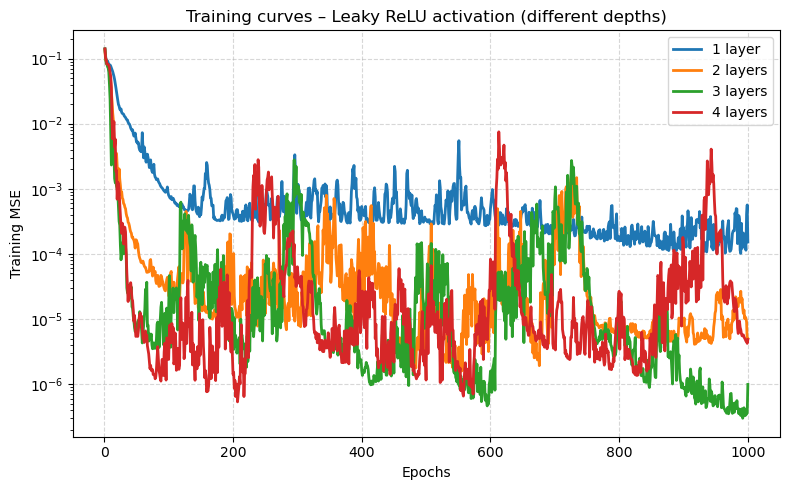

Test MSE for different depths: 
Depth=1, Test MSE = 4.700940304186266e-05
Depth=2, Test MSE = 1.669586612631014e-05
Depth=3, Test MSE = 1.9561668417288353e-06
Depth=4, Test MSE = 1.7685438093836992e-05


In [40]:
### Leaky ReLU ACTIVATION ### 
architectures = [
    ([32, 1], [leaky_relu, linear], [leaky_relu_deriv, linear_deriv]),
    ([32, 32, 1], [leaky_relu, leaky_relu, linear], [leaky_relu_deriv, leaky_relu_deriv, linear_deriv]),
    ([32, 32, 32, 1], [leaky_relu, leaky_relu, leaky_relu, linear], 
     [leaky_relu_deriv, leaky_relu_deriv, leaky_relu_deriv, linear_deriv]),
    ([32, 32, 32, 32, 1], [leaky_relu, leaky_relu, leaky_relu, leaky_relu, linear], 
     [leaky_relu_deriv, leaky_relu_deriv, leaky_relu_deriv, leaky_relu_deriv, linear_deriv])
]
learnings = []
test_MSEs_leaky_relu = []
for arc in architectures:
    nn = NeuralNetwork(network_input_size=1,
                       layer_output_sizes=arc[0],
                       activation_funcs=arc[1],
                       activation_ders=arc[2],
                       cost_fun=mse,
                       cost_der=mse_deriv,
                       seed=seed)
    optimizer = Adam(lr=1e-2)
    history = nn.fit(x_train_s, 
                     y_train, 
                     epochs=1000,
                     batch_size=32,
                     optimizer=optimizer,
                     log_every=None)
    learnings.append(history["train_loss"])
    y_pred_test = nn.predict(x_test_s)
    test_MSEs_leaky_relu.append(mse(y_pred_test, y_test))
    
### Plotting training curves ###
plt.figure(figsize=(8,5))
depth_labels = ["1 layer", "2 layers", "3 layers", "4 layers"]
for losses, label in zip(learnings, depth_labels):
    epochs = np.arange(1, len(losses)+1)
    plt.plot(epochs, losses, label=label, linewidth=2)
plt.yscale("log")
plt.xlabel("Epochs")
plt.ylabel("Training MSE")
plt.title("Training curves – Leaky ReLU activation (different depths)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### Printing MSE for test data ###
print("Test MSE for different depths: ")
for i in range(len(test_MSEs_leaky_relu)):
    print(f"Depth={i+1}, Test MSE = {test_MSEs_leaky_relu[i]}")
    


    

## Plotting test MSEs as a function of network depth

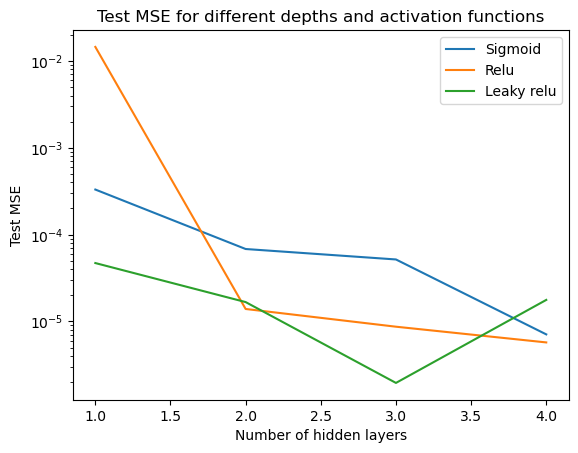

In [41]:
depths = np.arange(1, len(test_MSEs_leaky_relu)+1)
plt.plot(depths, test_MSEs_sigmoid, label="Sigmoid")
plt.plot(depths, test_MSEs_relu, label="Relu")
plt.plot(depths, test_MSEs_leaky_relu, label="Leaky relu")
plt.yscale("log")
plt.xlabel("Number of hidden layers")
plt.ylabel("Test MSE")
plt.title("Test MSE for different depths and activation functions")
plt.legend()
plt.show()

## Testing different depths and number of nodes - Heatmap, Sigmoid

Depth=1, Width=8 → Test MSE = 4.071e-04
Depth=1, Width=16 → Test MSE = 2.940e-04
Depth=1, Width=32 → Test MSE = 3.303e-04
Depth=1, Width=64 → Test MSE = 3.825e-04
Depth=1, Width=128 → Test MSE = 2.870e-04
Depth=2, Width=8 → Test MSE = 2.910e-04
Depth=2, Width=16 → Test MSE = 1.419e-04
Depth=2, Width=32 → Test MSE = 6.823e-05
Depth=2, Width=64 → Test MSE = 6.279e-05
Depth=2, Width=128 → Test MSE = 4.312e-05
Depth=3, Width=8 → Test MSE = 8.401e-02
Depth=3, Width=16 → Test MSE = 8.977e-02
Depth=3, Width=32 → Test MSE = 5.171e-05
Depth=3, Width=64 → Test MSE = 1.017e-05
Depth=3, Width=128 → Test MSE = 2.733e-05
Depth=4, Width=8 → Test MSE = 8.508e-02
Depth=4, Width=16 → Test MSE = 8.877e-02
Depth=4, Width=32 → Test MSE = 7.089e-06
Depth=4, Width=64 → Test MSE = 4.459e-04
Depth=4, Width=128 → Test MSE = 7.298e-02


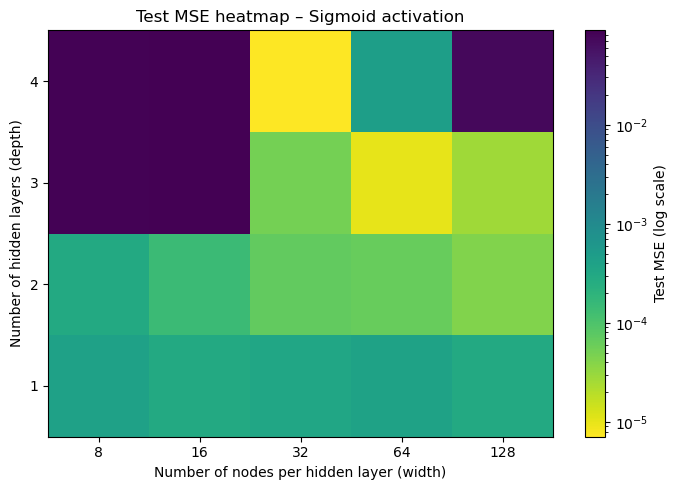

In [42]:
### Sigmoid – VARYING DEPTH AND WIDTH ###

depths = [1, 2, 3, 4]
widths = [8, 16, 32, 64, 128]

# tom matrise for test-MSE (rows=depths, cols=widths)
test_MSE_matrix = np.zeros((len(depths), len(widths)))

for i, d in enumerate(depths):
    for j, w in enumerate(widths):
        # bygg arkitektur med d skjulte lag og w noder per lag
        layer_output_sizes = [w]*d + [1]
        activation_funcs = [sigmoid]*d + [linear]
        activation_ders  = [sigmoid_deriv]*d + [linear_deriv]

        nn = NeuralNetwork(
            network_input_size=1,
            layer_output_sizes=layer_output_sizes,
            activation_funcs=activation_funcs,
            activation_ders=activation_ders,
            cost_fun=mse,
            cost_der=mse_deriv,
            seed=seed
        )

        optimizer = Adam(lr=1e-2)
        history = nn.fit(
            x_train_s, y_train,
            epochs=500,
            batch_size=32,
            optimizer=optimizer,
            log_every=None
        )

        y_pred_test = nn.predict(x_test_s)
        test_mse = mse(y_pred_test, y_test)
        test_MSE_matrix[i, j] = test_mse

        print(f"Depth={d}, Width={w} → Test MSE = {test_mse:.3e}")

### Plot heatmap of Test-MSE ###

plt.figure(figsize=(7,5))
im = plt.imshow(
    test_MSE_matrix,
    origin='lower',
    aspect='auto',
    cmap='viridis_r',
    interpolation='nearest'
)
plt.colorbar(im, label='Test MSE (log scale)')
plt.xticks(np.arange(len(widths)), widths)
plt.yticks(np.arange(len(depths)), depths)
plt.xlabel("Number of nodes per hidden layer (width)")
plt.ylabel("Number of hidden layers (depth)")
plt.title("Test MSE heatmap – Sigmoid activation")

# log-skala for fargene (gir bedre kontrast)
im.set_norm(plt.matplotlib.colors.LogNorm(vmin=test_MSE_matrix.min(), 
                                          vmax=test_MSE_matrix.max()))

plt.tight_layout()
plt.show()


## Testing different depths and number of nodes - Heatmap, ReLU

Depth=1, Width=8 → Test MSE = 1.048e-02
Depth=1, Width=16 → Test MSE = 1.888e-02
Depth=1, Width=32 → Test MSE = 1.452e-02
Depth=1, Width=64 → Test MSE = 2.223e-02
Depth=1, Width=128 → Test MSE = 8.919e-04
Depth=2, Width=8 → Test MSE = 7.429e-02
Depth=2, Width=16 → Test MSE = 3.094e-05
Depth=2, Width=32 → Test MSE = 1.390e-05
Depth=2, Width=64 → Test MSE = 1.720e-05
Depth=2, Width=128 → Test MSE = 1.345e-05
Depth=3, Width=8 → Test MSE = 9.350e-05
Depth=3, Width=16 → Test MSE = 3.628e-05
Depth=3, Width=32 → Test MSE = 8.690e-06
Depth=3, Width=64 → Test MSE = 2.052e-05
Depth=3, Width=128 → Test MSE = 3.680e-06
Depth=4, Width=8 → Test MSE = 3.753e-05
Depth=4, Width=16 → Test MSE = 7.431e-02
Depth=4, Width=32 → Test MSE = 5.727e-06
Depth=4, Width=64 → Test MSE = 5.609e-06
Depth=4, Width=128 → Test MSE = 1.850e-05


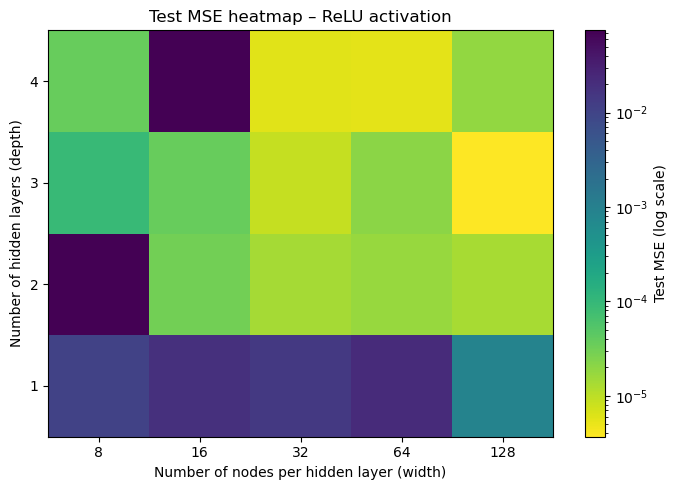

In [43]:
### RELU – VARYING DEPTH AND WIDTH ###

depths = [1, 2, 3, 4]
widths = [8, 16, 32, 64, 128]

# tom matrise for test-MSE (rows=depths, cols=widths)
test_MSE_matrix = np.zeros((len(depths), len(widths)))

for i, d in enumerate(depths):
    for j, w in enumerate(widths):
        # bygg arkitektur med d skjulte lag og w noder per lag
        layer_output_sizes = [w]*d + [1]
        activation_funcs = [relu]*d + [linear]
        activation_ders  = [relu_deriv]*d + [linear_deriv]

        nn = NeuralNetwork(
            network_input_size=1,
            layer_output_sizes=layer_output_sizes,
            activation_funcs=activation_funcs,
            activation_ders=activation_ders,
            cost_fun=mse,
            cost_der=mse_deriv,
            seed=seed
        )

        optimizer = Adam(lr=5e-3)  # lr=5e-3 fungerte bra for ReLU
        history = nn.fit(
            x_train_s, y_train,
            epochs=1000,
            batch_size=32,
            optimizer=optimizer,
            log_every=None
        )

        y_pred_test = nn.predict(x_test_s)
        test_mse = mse(y_pred_test, y_test)
        test_MSE_matrix[i, j] = test_mse

        print(f"Depth={d}, Width={w} → Test MSE = {test_mse:.3e}")

### Plot heatmap of Test-MSE ###

plt.figure(figsize=(7,5))
im = plt.imshow(
    test_MSE_matrix,
    origin='lower',
    aspect='auto',
    cmap='viridis_r',
    interpolation='nearest'
)
plt.colorbar(im, label='Test MSE (log scale)')
plt.xticks(np.arange(len(widths)), widths)
plt.yticks(np.arange(len(depths)), depths)
plt.xlabel("Number of nodes per hidden layer (width)")
plt.ylabel("Number of hidden layers (depth)")
plt.title("Test MSE heatmap – ReLU activation")

# log-skala for fargene (gir bedre kontrast)
im.set_norm(plt.matplotlib.colors.LogNorm(vmin=test_MSE_matrix.min(), 
                                          vmax=test_MSE_matrix.max()))

plt.tight_layout()
plt.show()


## Testing different depths and number of nodes - Heatmap, Leaky ReLU

Depth=1, Width=8 → Test MSE = 1.108e-04
Depth=1, Width=16 → Test MSE = 6.861e-04
Depth=1, Width=32 → Test MSE = 4.701e-05
Depth=1, Width=64 → Test MSE = 6.255e-04
Depth=1, Width=128 → Test MSE = 1.037e-04
Depth=2, Width=8 → Test MSE = 1.716e-04
Depth=2, Width=16 → Test MSE = 2.320e-04
Depth=2, Width=32 → Test MSE = 1.670e-05
Depth=2, Width=64 → Test MSE = 8.627e-06
Depth=2, Width=128 → Test MSE = 7.815e-06
Depth=3, Width=8 → Test MSE = 1.771e-05
Depth=3, Width=16 → Test MSE = 1.498e-05
Depth=3, Width=32 → Test MSE = 1.956e-06
Depth=3, Width=64 → Test MSE = 1.577e-05
Depth=3, Width=128 → Test MSE = 3.464e-04
Depth=4, Width=8 → Test MSE = 2.116e-05
Depth=4, Width=16 → Test MSE = 3.437e-06
Depth=4, Width=32 → Test MSE = 1.769e-05
Depth=4, Width=64 → Test MSE = 6.201e-06
Depth=4, Width=128 → Test MSE = 2.661e-06


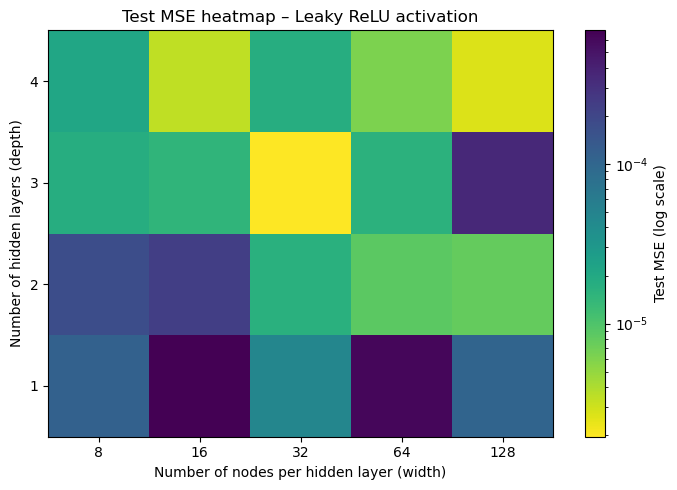

In [44]:
### Leaky RELU – VARYING DEPTH AND WIDTH ###

depths = [1, 2, 3, 4]
widths = [8, 16, 32, 64, 128]

# tom matrise for test-MSE (rows=depths, cols=widths)
test_MSE_matrix = np.zeros((len(depths), len(widths)))

for i, d in enumerate(depths):
    for j, w in enumerate(widths):
        # bygg arkitektur med d skjulte lag og w noder per lag
        layer_output_sizes = [w]*d + [1]
        activation_funcs = [leaky_relu]*d + [linear]
        activation_ders  = [leaky_relu_deriv]*d + [linear_deriv]

        nn = NeuralNetwork(
            network_input_size=1,
            layer_output_sizes=layer_output_sizes,
            activation_funcs=activation_funcs,
            activation_ders=activation_ders,
            cost_fun=mse,
            cost_der=mse_deriv,
            seed=seed
        )

        optimizer = Adam(lr=1e-2) 
        history = nn.fit(
            x_train_s, y_train,
            epochs=1000,
            batch_size=32,
            optimizer=optimizer,
            log_every=None
        )

        y_pred_test = nn.predict(x_test_s)
        test_mse = mse(y_pred_test, y_test)
        test_MSE_matrix[i, j] = test_mse

        print(f"Depth={d}, Width={w} → Test MSE = {test_mse:.3e}")

### Plot heatmap of Test-MSE ###

plt.figure(figsize=(7,5))
im = plt.imshow(
    test_MSE_matrix,
    origin='lower',
    aspect='auto',
    cmap='viridis_r',
    interpolation='nearest'
)
plt.colorbar(im, label='Test MSE (log scale)')
plt.xticks(np.arange(len(widths)), widths)
plt.yticks(np.arange(len(depths)), depths)
plt.xlabel("Number of nodes per hidden layer (width)")
plt.ylabel("Number of hidden layers (depth)")
plt.title("Test MSE heatmap – Leaky ReLU activation")

# log-skala for fargene (gir bedre kontrast)
im.set_norm(plt.matplotlib.colors.LogNorm(vmin=test_MSE_matrix.min(), 
                                          vmax=test_MSE_matrix.max()))

plt.tight_layout()
plt.show()
